<a href="https://colab.research.google.com/github/jindaldisha/fashion-mnist-clothing-classification/blob/main/fashion_mnist_clothing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Clothing Classification

The Fashion MNIST dataset comprises of 70,000 28x28 pixel grayscales images of 10 types of clothing items divided into 60,000 training and 10,000 testing samples. 

Each training and test example is assigned to one of the following labels:

- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

Since it is a dataset of grayscale images, there is only 1 color channel. The pixel values range from 0 to 255, representing black and white. And the value in between different shades of grey.

In [16]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

##Import Data

In [17]:
#The data has already been split into training and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [18]:
print('Number of training samples: ',len(train_data))
print('Number of testing samples: ', len(test_data))

Number of training samples:  60000
Number of testing samples:  10000


In [19]:
#View first training example
print(f'Training Sample:\n{train_data[0]}\n')
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [20]:
#Range of pixel
print("Max: ", tf.reduce_max(train_data[0]).numpy())
print("Min: ", tf.reduce_min(train_data[0]).numpy())

Max:  255
Min:  0


In [21]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [22]:
#Create a list of label names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(classes)

10

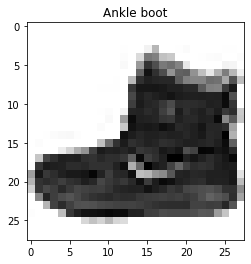

In [23]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.title(classes[train_labels[0]]);

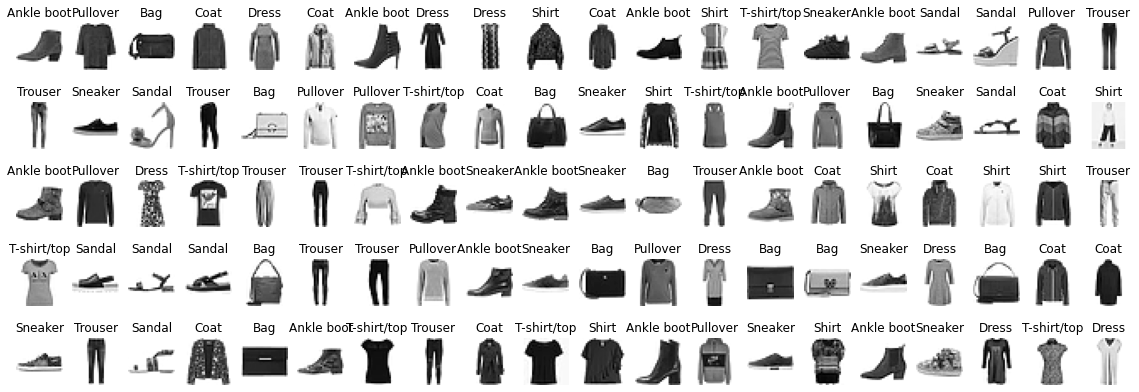

In [24]:
#Plot multiple random images 
import random
plt.figure(figsize=(20,7))
# plt.subplots_adjust(hspace=0.4, wspace=0.5)
for i in range(100):
  ax = plt.subplot(5,20,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False)

##Model

Broadly, first we pass our input data after numerically encoding them to our neural network. Our neural network is going to learn the representations (i.e. the patterns/ features/ weights). At the beginning, our neural network is going to initialize itself with random weights. It does this using the parameter kernel_initializer. We're going to show it different examples of the data we're trying to learn. And our neural network is going to update its representation outputs (weights and biases) based on these training examples. And its going to slowly adjust these patterns to better suit the data as best as it can. Ideally we aim for a case where it outputs all the correct values.

A weights matrix is has one value per data point. Whereas a bias matrix has one value per hidden layer. Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also gets initialized. It is done using the parameter bias_initializer. It gets initialized to zeros, atleast in the cas of a TensorFlow Dense Layer.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In each layer in a deep learning model, the previous layer is its inputs. It is called a deep learning model because its deep (i.e. it has multiple layers). A deep learning model is just a neural network model with many layer. Each layer does it work to find patterns in the data and then feeds it to the next layer.

Steps in modelling:

- Creating a model
- Compiling the model
  - Defining a loss function (how wrong our models predictions are)
  - Setting up an optimizer (how your model should update its internal patterns to better its predictions)
 - Creating evaluation metrics (human interpretable values for how well our model is doing)
- Fitting a model (getting it to find patterns in our data)

In [25]:
#Experiment Model 1
#Set random seed
tf.random.set_seed(42)

#Build a Model

# 1. Create a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten our data to (None, 784)                           
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)                               
])

# 2. Compile the Model
model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the Model
non_norm_history = model_1.fit(
    train_data,
    train_labels, 
    epochs=10,
    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [26]:
import pandas as pd
#Function to plot loss curves
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  plt.figure(figsize=(20,7))
  #Plot Loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss', marker='x', c='forestgreen', ls='-')
  plt.plot(epochs, val_loss, label='val_loss', marker='x', c='deepskyblue', ls='-')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot Accuracy
  plt.subplot(1,2,2)
  plt.ylim(0,1)
  plt.plot(epochs, accuracy, label='training_accuracy', marker='x', c='forestgreen', ls='-')
  plt.plot(epochs, val_accuracy, label='val_accuracy', marker='x', c='deepskyblue', ls='-')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

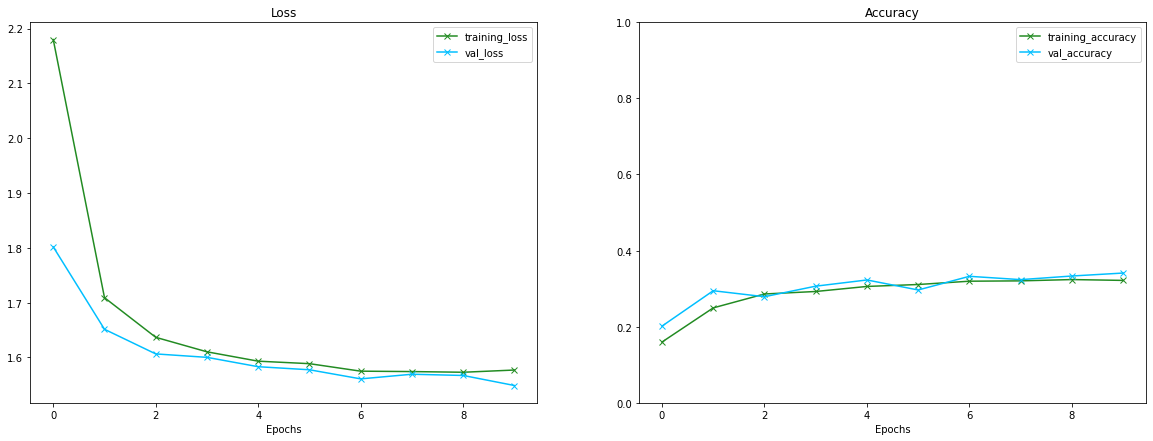

In [27]:
#Plot Hisotry of Model 1
plot_loss_curves(non_norm_history)

In [28]:
#View Model 1 Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


##Normalization

Neural Networks prefer data to be scaled. To get better results, we need to normalize our data i.e turn it into range of (0,1). Since we're working on an images dataset, the max value of our data is 255 and the min value is 0. We can normalize our data by dividing it by the max value i.e. dividing it by 255.

In [29]:
#Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#Check min and max value of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [30]:
#Experiment Model 2 (Change from previous - data has been normalized)
#Set random seed
tf.random.set_seed(42)

#Build a Model

# 1. Create a Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten our data to (None, 784)                           
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)                               
])

# 2. Compile the Model
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the Model
norm_history = model_2.fit(
    train_data_norm,
    train_labels, 
    epochs=10,
    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

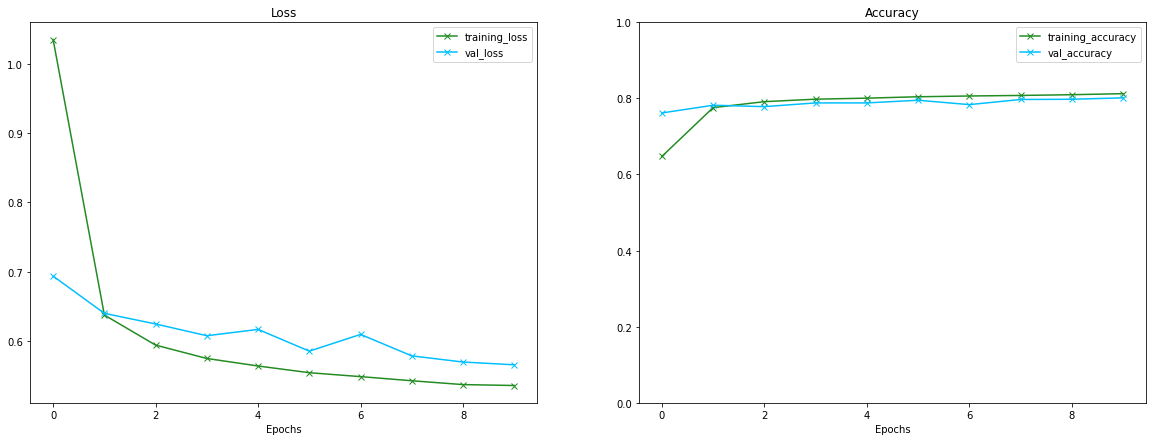

In [31]:
#Plot Hisotry of Model 2
plot_loss_curves(norm_history)

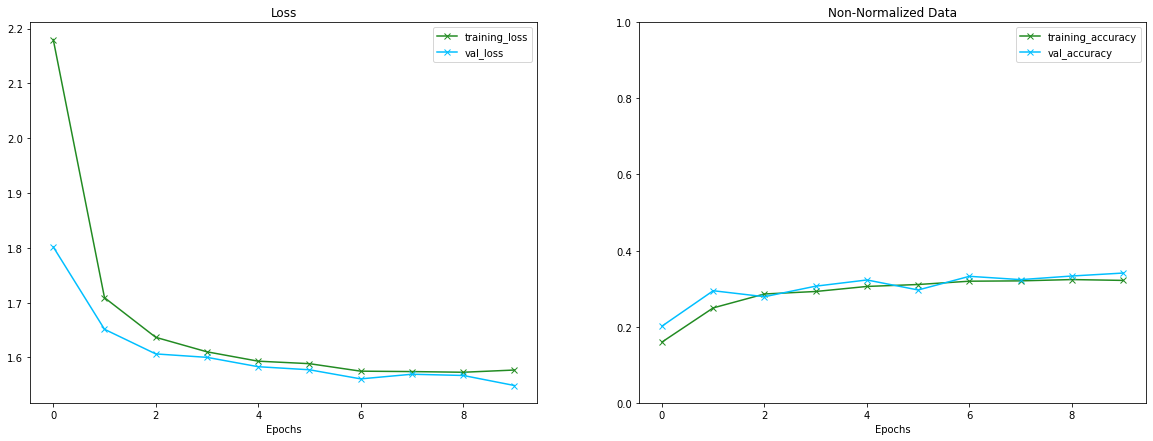

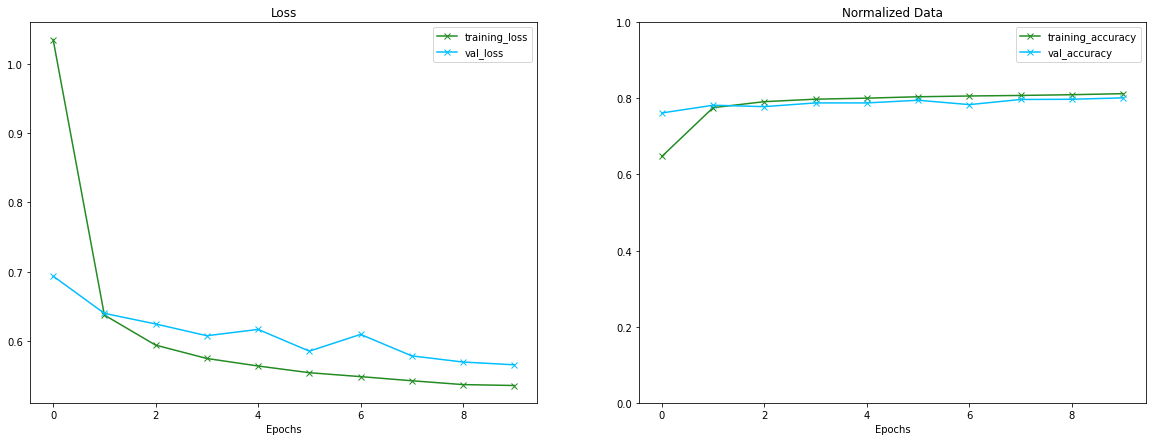

In [32]:
#Comparing Loss Curves of Non-Normalized and Normalized Data
plot_loss_curves(non_norm_history)
plt.title("Non-Normalized Data")
plot_loss_curves(norm_history)
plt.title("Normalized Data");

##Finding Ideal Learning Rate

In [33]:
#Experiment Model 3 (Change from previous - finding the ideal learning rate)

# Set random seed
tf.random.set_seed(42)

# Build the Model

# 1. Create a Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                               
])
# 2. Compile the Model
model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the Model
history = model_3.fit(
      train_data_norm,
      train_labels,
      epochs=40,
      validation_data=(test_data_norm, test_labels),
      callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

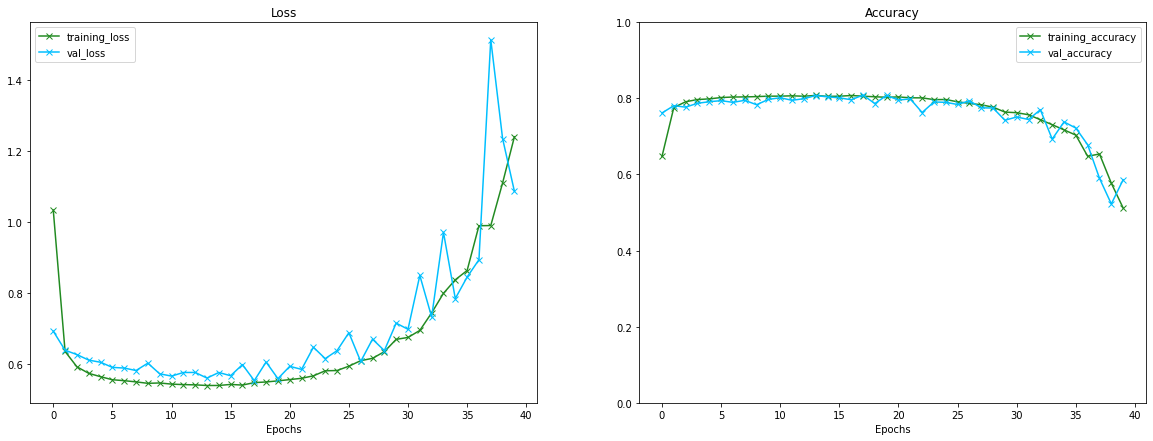

In [34]:
#Plot history
plot_loss_curves(history)

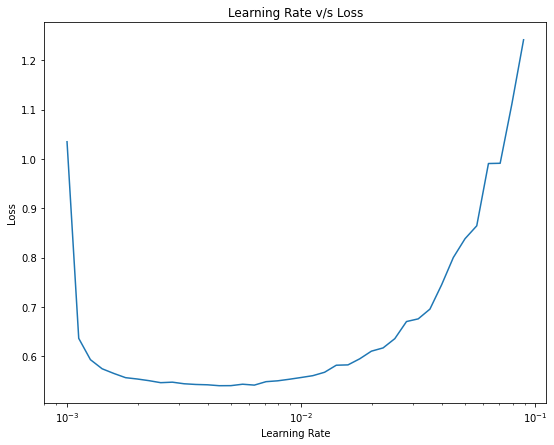

In [35]:
#Plot learning rate vs loss
lrs = 1e-3 * (10 ** (tf.range(40)/20)) #epochs=40
plt.figure(figsize=(9,7))
plt.semilogx(lrs, history.history['loss']);
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title("Learning Rate v/s Loss");

The ideal learning rate seems to be 0.001, which is the default learning rate of Adam optimizer.

In [36]:
#Experiment Model 4 (Change from previous - using the ideal learning rate previously found)

# Set random seed
tf.random.set_seed(42)

#Build the Model

# 1. Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 2. Compile the Model
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# 3. Fit the Model
history = model_4.fit(
    train_data_norm,
    train_labels,
    epochs=30,
    validation_data=(test_data_norm,test_labels)
)


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

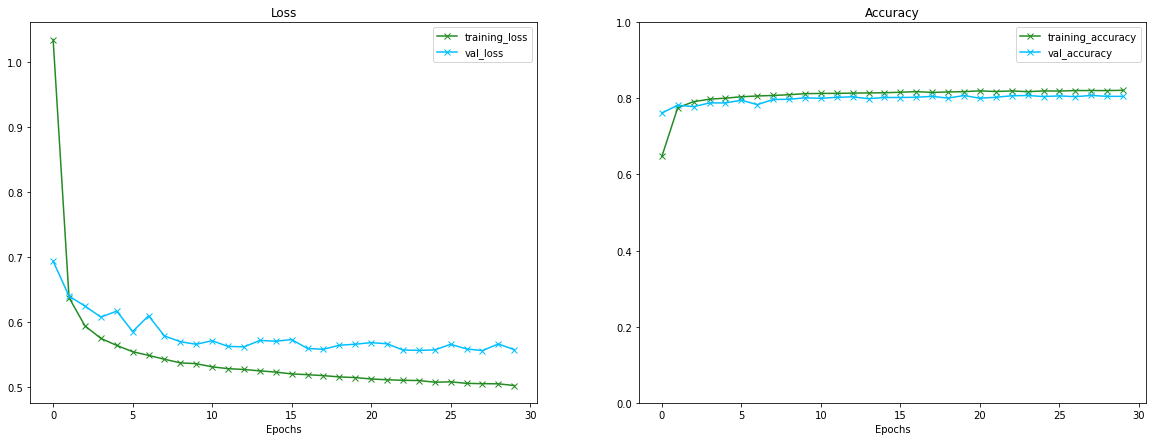

In [37]:
#Plot History
plot_loss_curves(history)

In [38]:
#Experiment Model 5 (Change from previous - adding more layers and hidden units and training for more epochs)

# Set random seed
tf.random.set_seed(42)

#Build the Model

# 1. Create a Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 2. Compile the Model
model_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# 3. Fit the Model
history = model_5.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data=(test_data_norm,test_labels)
)


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6058 - accuracy: 0.7876 - val_loss: 0.4702 - val_accuracy: 0.8330
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4250 - accuracy: 0.8498 - val_loss: 0.4605 - val_accuracy: 0.8382
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3911 - accuracy: 0.8611 - val_loss: 0.4250 - val_accuracy: 0.8502
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3689 - accuracy: 0.8669 - val_loss: 0.4214 - val_accuracy: 0.8489
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3558 - accuracy: 0.8694 - val_loss: 0.4112 - val_accuracy: 0.8514
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3425 - accuracy: 0.8737 - val_loss: 0.4023 - val_accuracy: 0.8538
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8766 - val_loss: 0.4224 - val_accuracy:

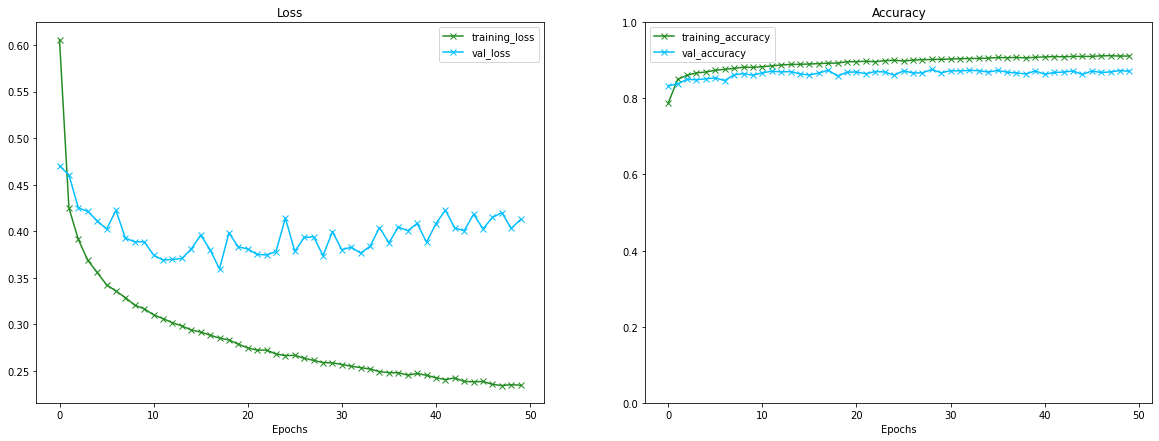

In [39]:
plot_loss_curves(history)

In [40]:
#Experiment Model 6 (Change from previous - adding more layers)

# Set random seed
tf.random.set_seed(42)

#Build the Model

# 1. Create a Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 2. Compile the Model
model_6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# 3. Fit the Model
history = model_6.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data=(test_data_norm,test_labels)
)


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6070 - accuracy: 0.7904 - val_loss: 0.4957 - val_accuracy: 0.8167
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4353 - accuracy: 0.8454 - val_loss: 0.4995 - val_accuracy: 0.8268
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3973 - accuracy: 0.8578 - val_loss: 0.4288 - val_accuracy: 0.8430
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8656 - val_loss: 0.4379 - val_accuracy: 0.8396
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3558 - accuracy: 0.8693 - val_loss: 0.4193 - val_accuracy: 0.8480
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3421 - accuracy: 0.8737 - val_loss: 0.4346 - val_accuracy: 0.8397
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8791 - val_loss: 0.4074 - val_accuracy:

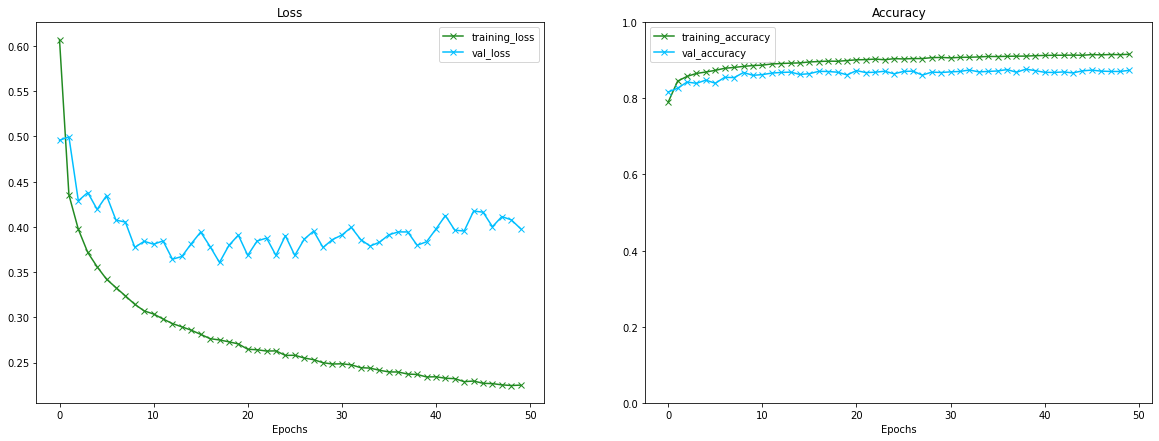

In [41]:
plot_loss_curves(history)

The model accuracy doesnt seem to surpass 90%. This can probably be changes if we use a CNN Model instead of a simple feed forward neural network.

##Evaluating the Model


To evaluate our multi-class classification model, we can:
- Evaluate its performance using classification metrics (e.g. Confusion Matrix)
- Assess its predictions (Through Visualizations)


In [42]:
#Make Predictions
y_probs = model_6.predict(test_data_norm) #Prediction Probabilities

#Turn Predictions into Integers
y_pred = tf.argmax(y_probs, axis=1)

In [43]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
cm

array([[792,   6,  19,  73,   3,   0,  97,   1,   9,   0],
       [  0, 971,   0,  20,   4,   0,   2,   0,   2,   1],
       [ 11,   7, 724,  18, 156,   1,  80,   0,   3,   0],
       [ 12,  10,  11, 921,  27,   0,  14,   0,   5,   0],
       [  0,   5,  55,  48, 845,   0,  42,   0,   5,   0],
       [  1,   0,   0,   1,   0, 943,   0,  28,   4,  23],
       [123,   4,  79,  48,  87,   0, 638,   0,  21,   0],
       [  0,   0,   0,   0,   0,  19,   0, 952,   0,  29],
       [  3,   0,   5,   7,   3,   1,   2,   1, 978,   0],
       [  0,   0,   0,   0,   0,  11,   0,  40,   0, 949]])

In [44]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
#Function to Visualize the confusion matrix

def create_confusion_matrix(y_test, y_pred, classes=None):
  figsize = (15, 15)

  #Create confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalize the confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  #Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(20)

  #Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2. 

  #Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                        horizontalalignment="center",
                        color="white" if cm[i,j] > threshold else "black",
                        size=10)


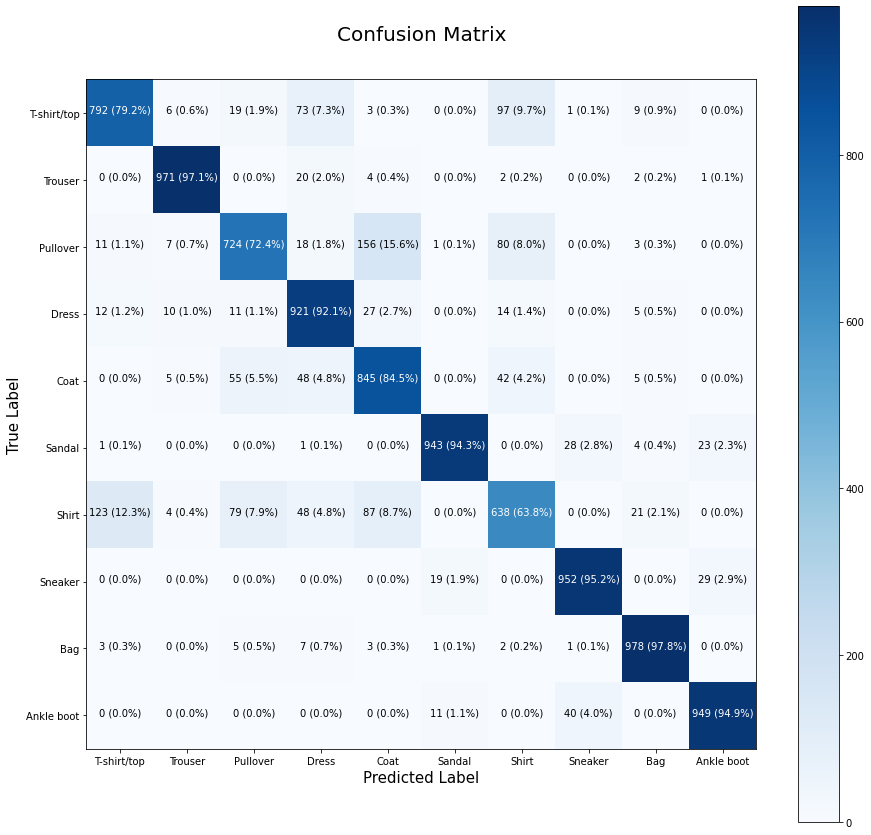

In [45]:
create_confusion_matrix(test_labels, y_pred, classes)

##Visualize Predictions

- Plot a random image
- Make prediction on the said image
- Label the plot with truth label and prediction label

In [46]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  #Select random n=integer
  i = random.randint(0,len(images))

  #Create predictions and targets
  target_image = images[i]

  pred_prob = model.predict(target_image.reshape(1,28,28))
  pred = pred_prob.argmax()
  pred_label = classes[pred]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap='binary')

  #Change color of title to 'green' if the prediction is right and to 'red' if the prediction is wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # xlabel = prediction/true label
  plt.xlabel(f"Pred: {pred_label} : {((tf.reduce_max(pred_prob))*100):2.0f}%, True: {true_label}", color = color)

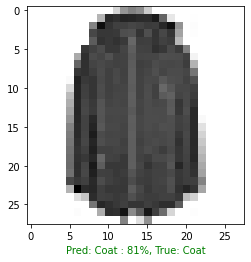

In [47]:
#Check random image
plot_random_image(model_6, test_data_norm, test_labels, classes)

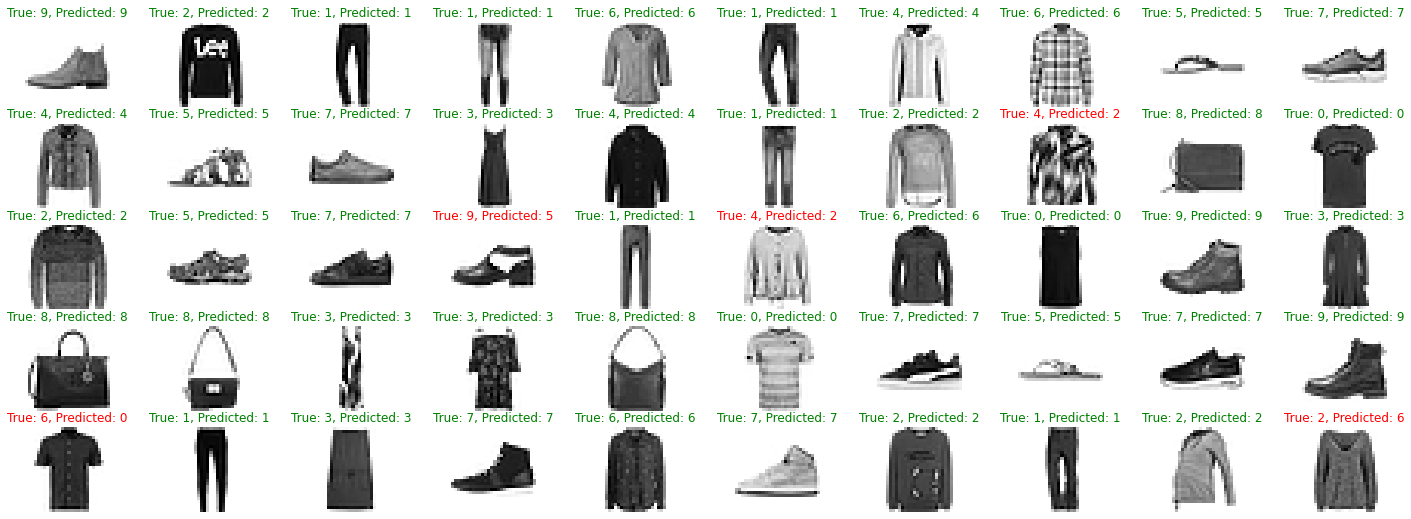

In [48]:
#Test on multiple images
plt.figure(figsize=(25,9))
# plt.subplots_adjust(hspace=0.4, wspace=0.5)
for i in range(50):
  plt.subplot(5,10,i+1)
  image = test_data_norm[i]
  label = test_labels[i]
  #We pass only the 28x28 matrix and exclude the color channel
  plt.imshow(image, cmap='binary')
  predicted_label = y_pred[i]
  if predicted_label == label:
    plt.title(f'True: {label}, Predicted: {predicted_label}', color='g')
  else:
    plt.title(f'True: {label}, Predicted: {predicted_label}', color='r')
  plt.axis(False)

In [49]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
Total params: 17,170
Trainable params: 17,170
Non-trainable params: 0
__________________________________________________

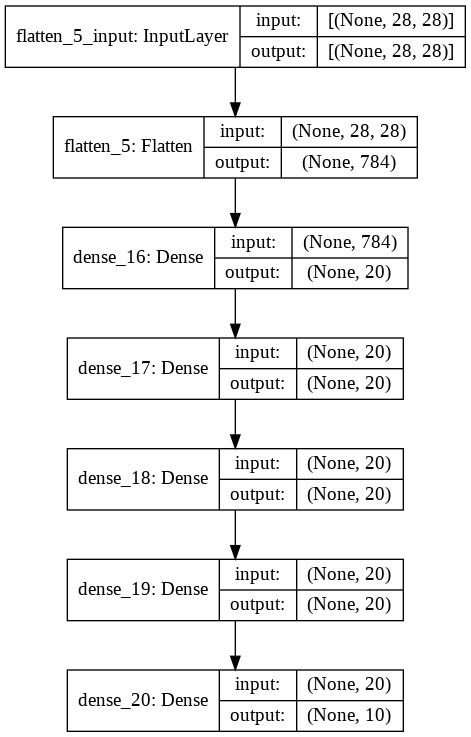

In [50]:
#View our deep learning model
from tensorflow.keras.utils import plot_model

#See inputs and outputs of each layer
plot_model(model_6, show_shapes=True)

In [51]:
result = model_6.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8738


Since the model is only a simple feed forward neural network, accuracy doesnt seem to cross 90%. We can increase our accuracy by using a CNN Model.